In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def clustering_process(
    df: pd.DataFrame,
    cluster_method: type[DBSCAN | KMeans],
    scaler_method: type[StandardScaler],
    main_data_columns: list[str] = ["price", "squareMeters", "cityCode"], 
    additional_data_columns: list[str] = ["id"],
    cluster_setup: dict[str, str] = {},
    scaler_setup: dict[str, str] = {}
) -> pd.DataFrame: 
    scaler = scaler_method(**scaler_setup)
    nums = df.loc[:, main_data_columns]
    ids = df.loc[:, additional_data_columns]
    norm_nums = scaler.fit_transform(nums)
    norm = np.column_stack((ids, norm_nums))

    dbscan = cluster_method(**cluster_setup)
    clusters = dbscan.fit_predict(norm_nums)

    processed_df = pd.DataFrame(
        columns=additional_data_columns + main_data_columns + ["cluster_id"])
    i = 0
    for cluster_id in np.unique(clusters):
        cluster_mask = (clusters == cluster_id)
        cluster_data = norm[cluster_mask]
        for data in cluster_data:
            processed_df.loc[i] = list(data) + [cluster_id]
            i += 1

    return processed_df


def cluster_visualize(
    df: pd.DataFrame, 
    x_column: str = "price", 
    y_column: str = "squareMeters", 
    figsize: tuple[int, int] = (10, 10),
    xlabel = "Розмір у м^2",
    ylabel = "Ціна у $",
    title = "Порівняння нерухомості ціна/розмір"
):
    fig, ax = plt.subplots(figsize=figsize)

    for cluster_id in df["cluster_id"].unique():
        cluster_df = df[df["cluster_id"] == cluster_id]
        sct = ax.scatter(cluster_df[x_column], cluster_df[y_column], cmap="viridis", edgecolors="black")
        sct.set_label(f"Cluster: {cluster_id}")

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.set_cmap('coolwarm')
    fig.legend(ncols=5)
    
    return fig, ax

In [2]:
train_df = pd.read_csv("datasets/paris_housing_price/train.csv")
test_df = pd.read_csv("datasets/paris_housing_price/test.csv")

/tmp/ipykernel_6870/646880436.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(cluster_df[x_column], cluster_df[y_column], cmap="viridis", edgecolors="black")


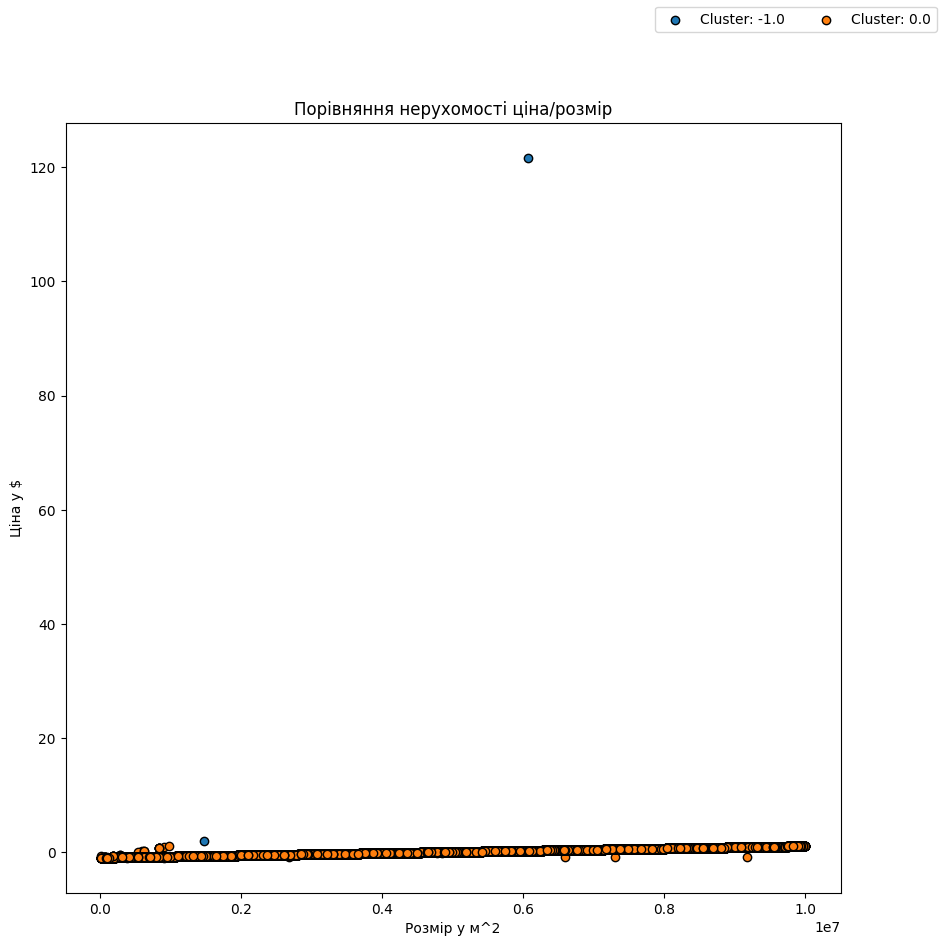

In [5]:
processed_df = clustering_process(train_df, DBSCAN, StandardScaler, main_data_columns=["squareMeters"], additional_data_columns=["price", "id"])
fig, ax = cluster_visualize(processed_df)
plt.show()

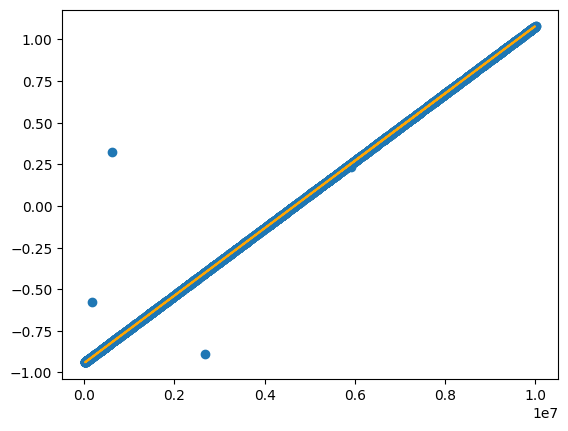

Accuracy:  0.9989399789107055
8186131.4 8173879.480217
658467.2 660354.0386759504
3876450.8 3875887.8089469024
5908459.6 5900767.793969463
6404986.7 6400225.547459525
7359509.9 7355623.152656741
6640110.8 6626798.109494385
7571050.6 7558340.7180720735
6773957.4 6764737.88074204
4311510.4 4307074.358722496
5792783.8 5791673.604408184
1899521.2 1901712.168203509
5862285.0 5855054.034757143
2385994.4 2390589.881351855
6091341.8 6088413.792482915
3337636.7 3341595.771690247
4713648.8 4708217.586395669
6197708.6 6192217.961873336
3594490.0 3589128.7910058657
6907585.5 6897188.008416164
2982668.0 2980576.8479545247
4224392.3 4223831.399807485
6331257.5 6321374.30340334
283521.6 285361.47675305605
1676719.7 1674740.3593633012
7825365.3 7816154.342625396
1953014.3 1948124.6093251877
3641586.3 3638435.7714663153
2767842.8 2762887.527338652
5865940.1 5856651.021978534
3360225.3 3355369.7864747457
4284208.7 4285315.407831042
8630496.6 8616244.940542331
2649524.7 2650399.7399319177
344710.4 344649

In [9]:
X = processed_df[processed_df["cluster_id"] == 0][["squareMeters"]]
ids = processed_df[processed_df["cluster_id"] == 0]["id"]
y = train_df[train_df["id"].isin(ids)]["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lnm = LinearRegression()
lnm = lnm.fit(X_train, y_train)
predictions = lnm.predict(X_test)

plt.scatter(y_test, X_test["squareMeters"])
plt.plot(predictions, X_test["squareMeters"], color="orange")
plt.show()

# print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("Accuracy: ", r2_score(y_test, predictions))

with pd.option_context("display.max_rows", None):
    for t1, t2 in zip(y_test, predictions):
        print(t1, t2)

/tmp/ipykernel_38030/2734808814.py:55: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sct = ax.scatter(cluster_df[x_column], cluster_df[y_column], cmap="viridis", edgecolors="black")


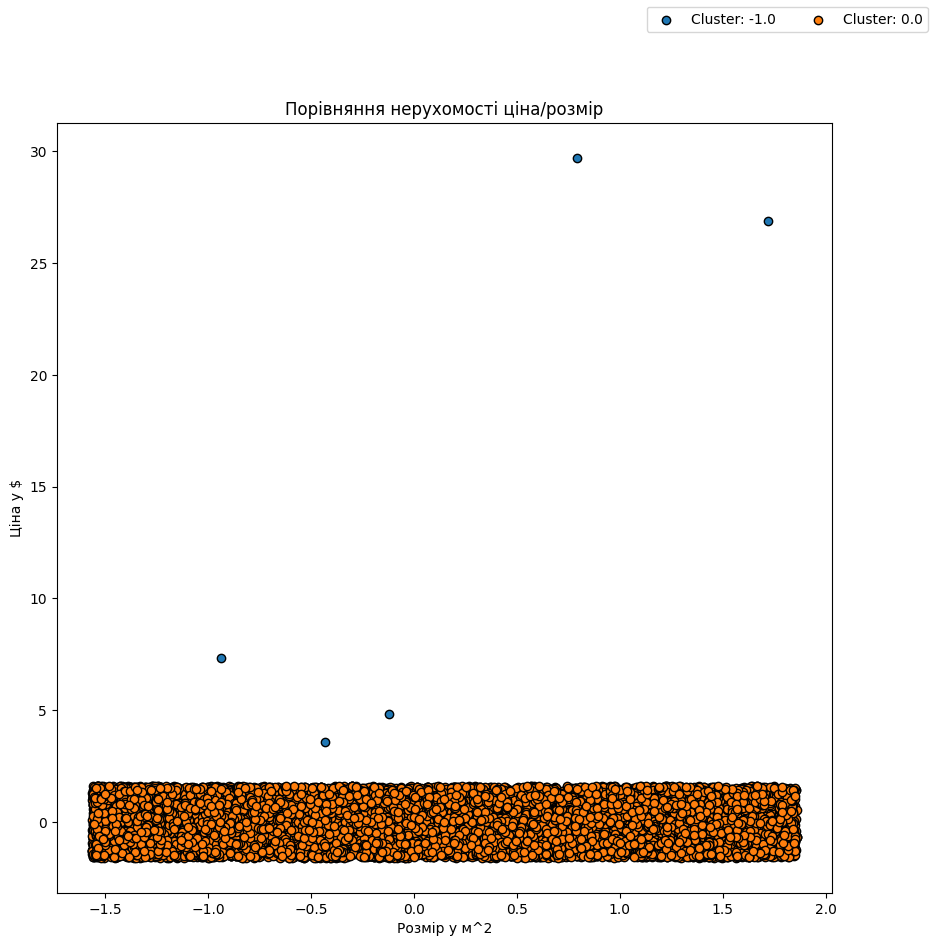

In [5]:
processed_df = clustering_process(test_df, DBSCAN, StandardScaler, main_data_columns=["squareMeters", "cityCode"])
fig, ax = cluster_visualize(processed_df, "squareMeters", "cityCode")
plt.show()

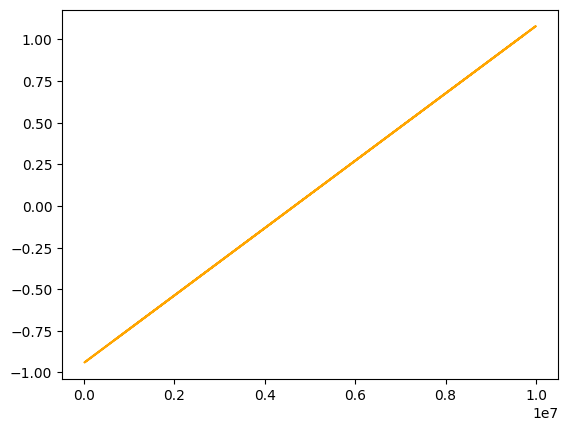

In [6]:
X = processed_df[processed_df["cluster_id"] == 0][["squareMeters"]]

predictions = lnm.predict(X_test)

# plt.scatter(y_test, X_test["squareMeters"])
plt.plot(predictions, X_test["squareMeters"], color="orange")
plt.show()